In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import demo_noise_distribution_data_importer as xxx

data_set = xxx.getData()
#data_set: list([sessionName, chName, DataFrame(['time','raw','power'])])

100%|██████████| 5/5 [00:13<00:00,  2.12s/it]


In [2]:
def countWithRange(target, countRange=None, name='power'):
    if countRange is None:
        target_data = target[name].values
    else:
        target_data = target[name].values[countRange[0]:countRange[1]]
    utarget,uind=np.unique(target_data,return_inverse=True)
    target_count=np.bincount(uind)
    auc = target_count.sum()
    
    return utarget, target_count, auc

# 将Power后的数据压缩在Y轴上
power后的数据肉眼看并不是标准的正态分布，用sigma的方法可能并不是很合理。

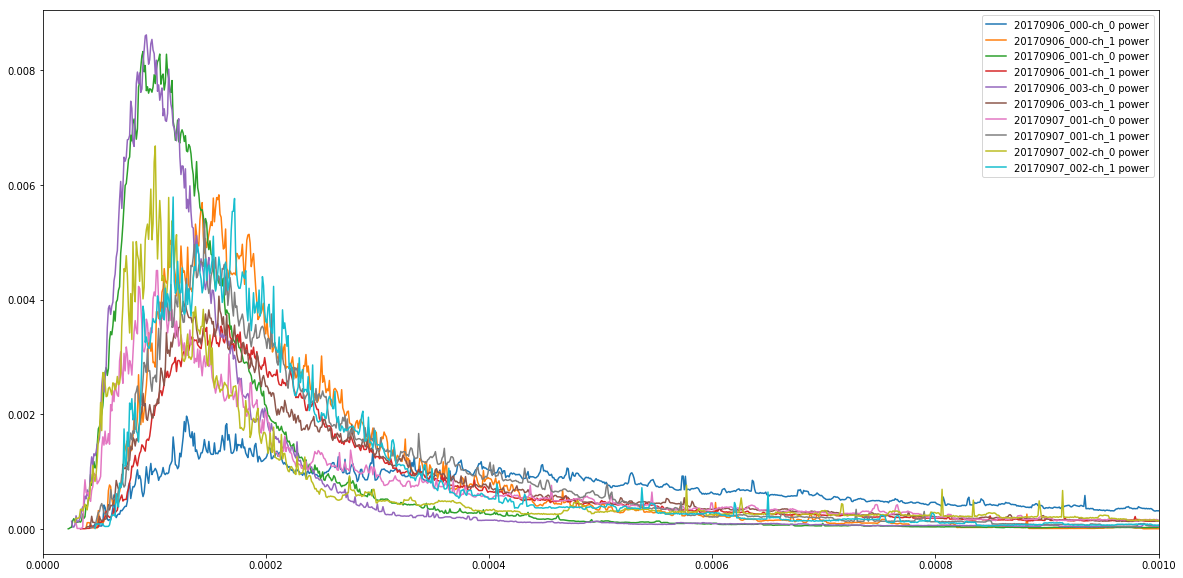

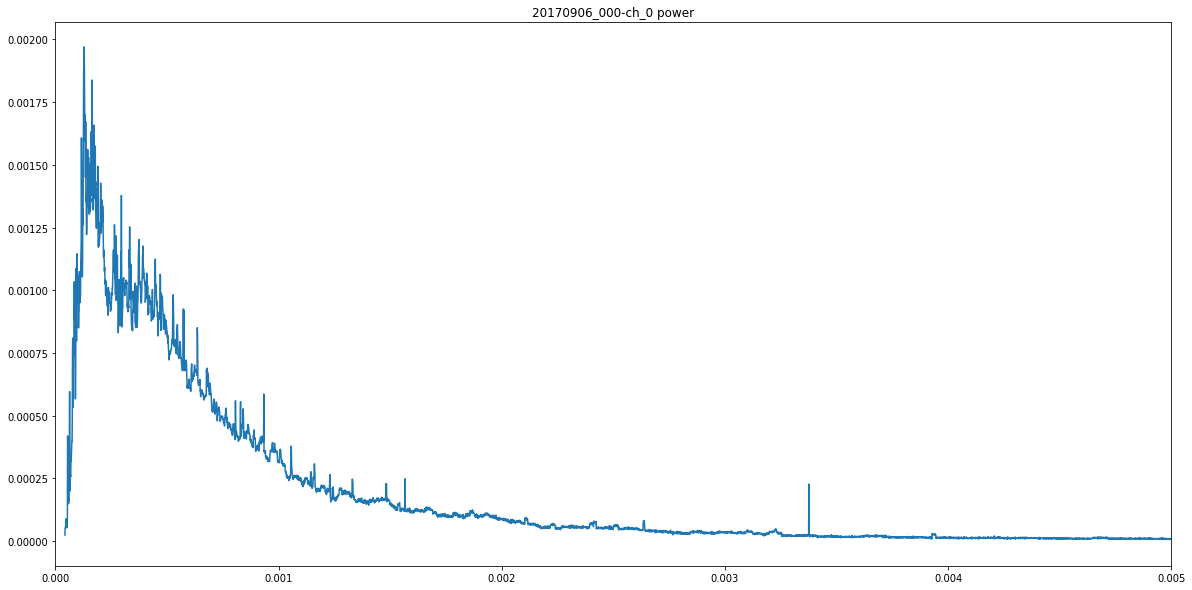

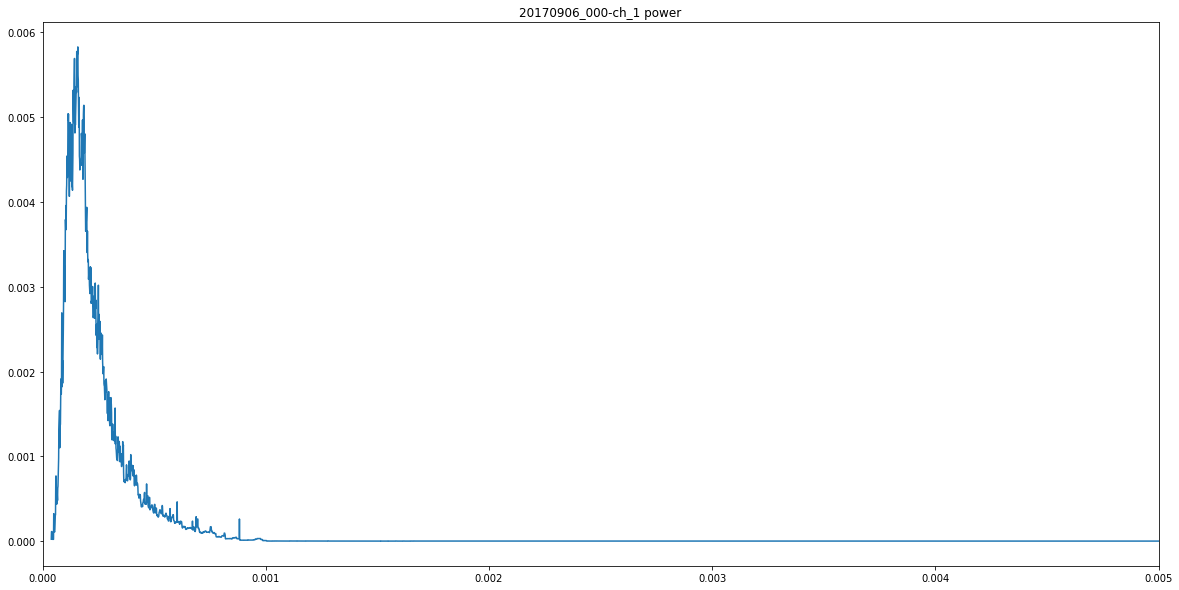

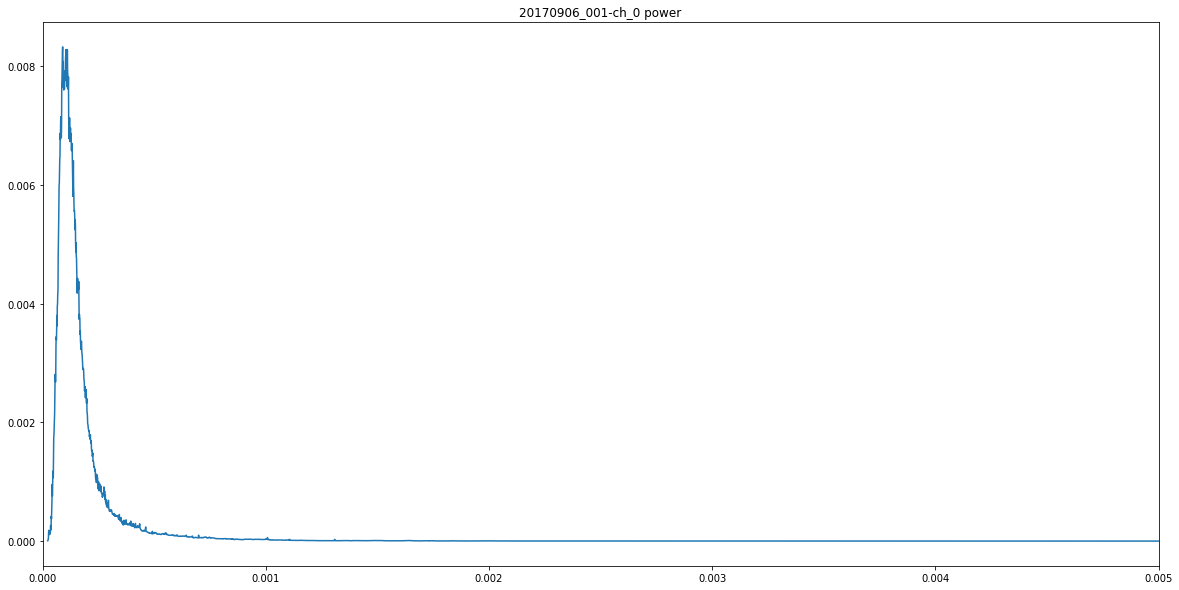

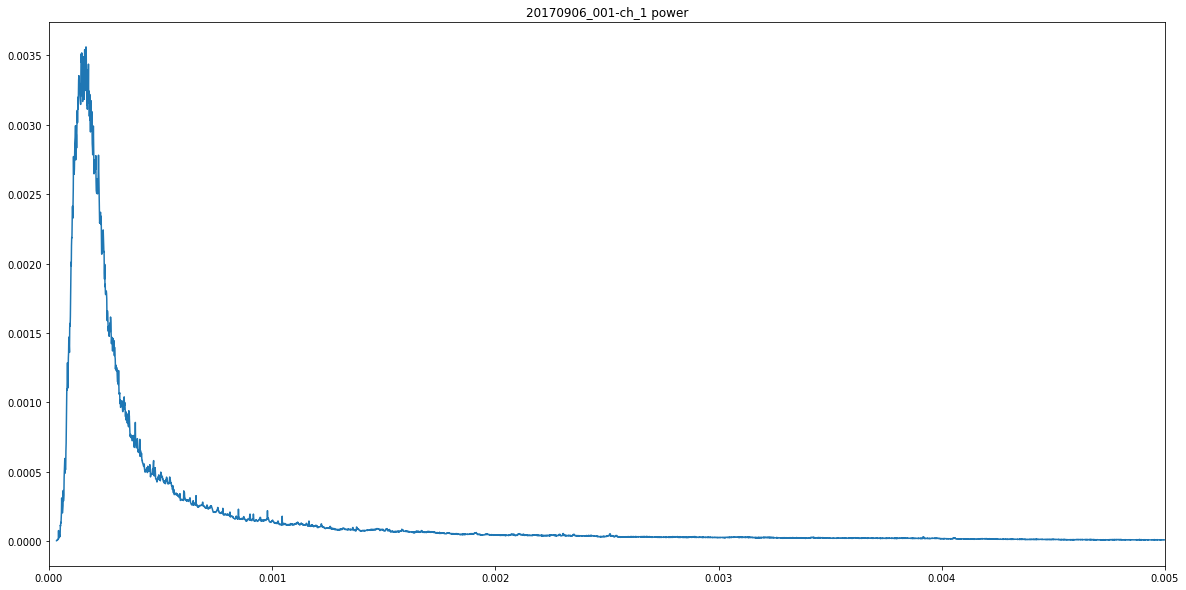

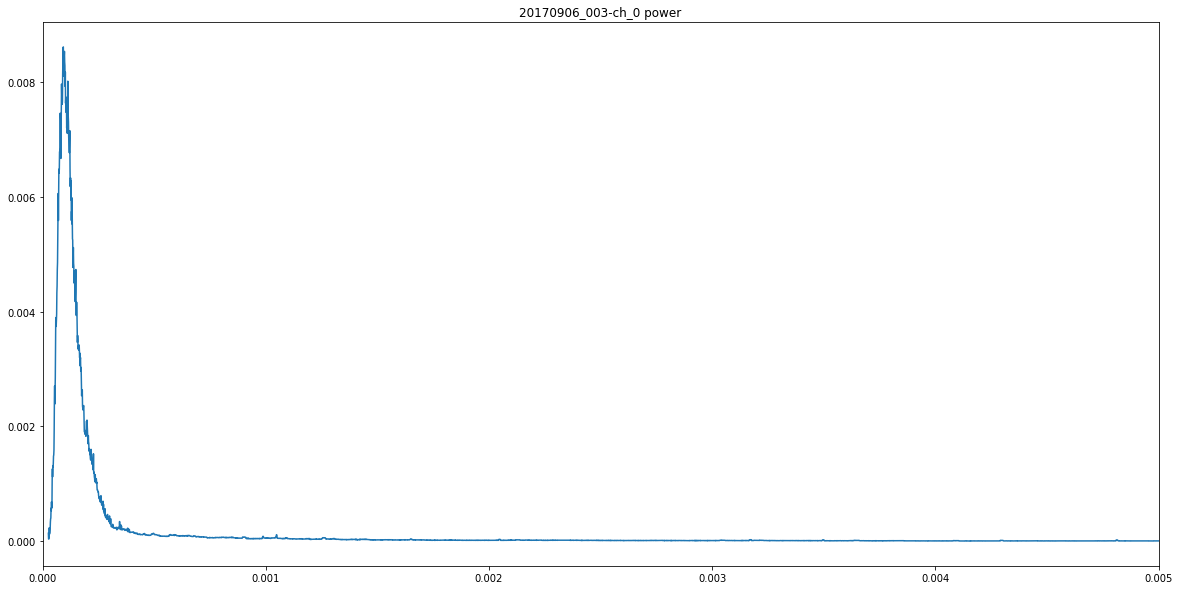

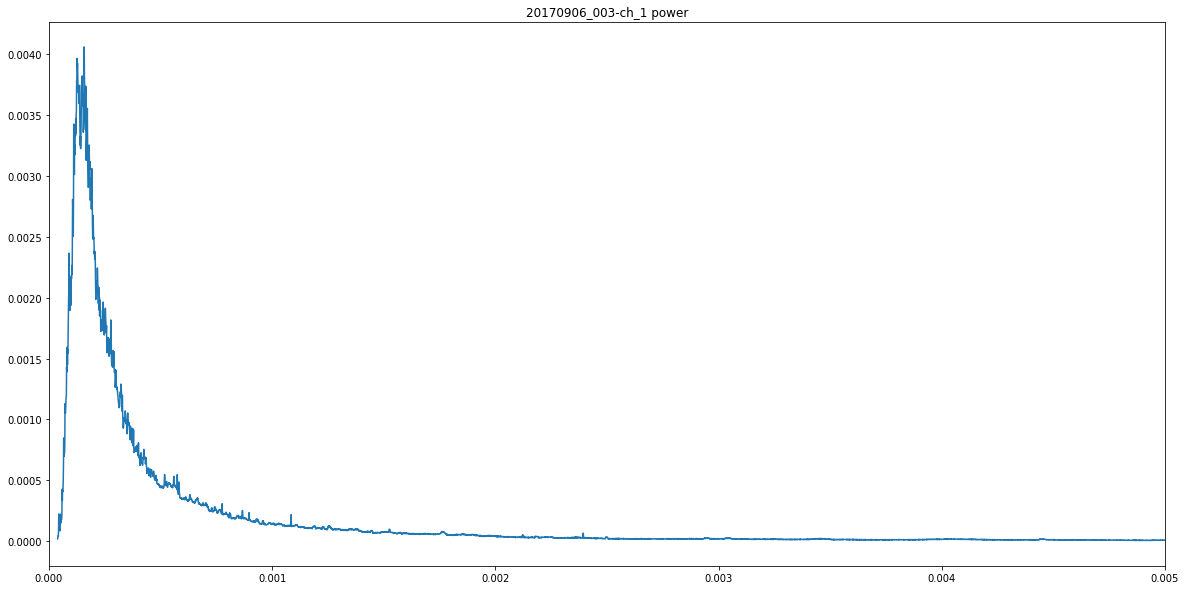

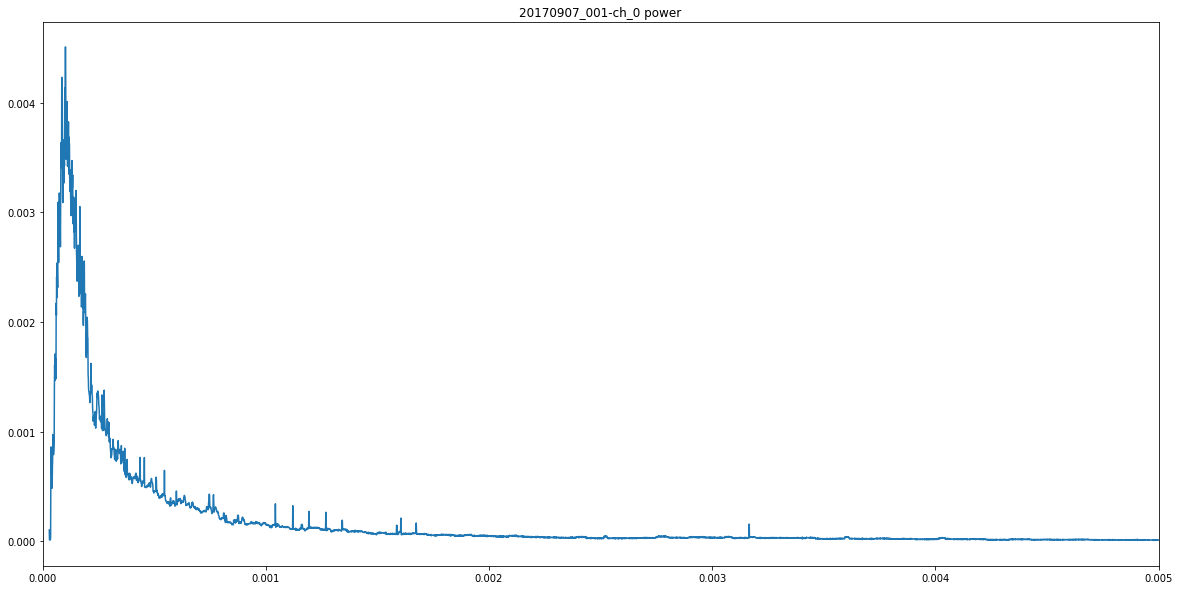

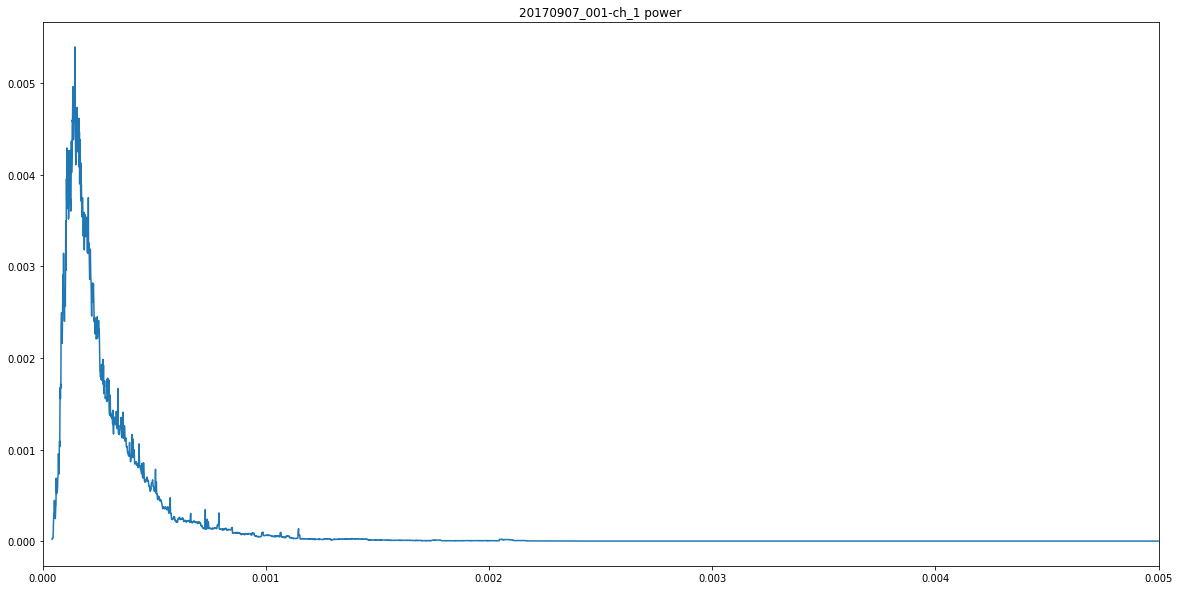

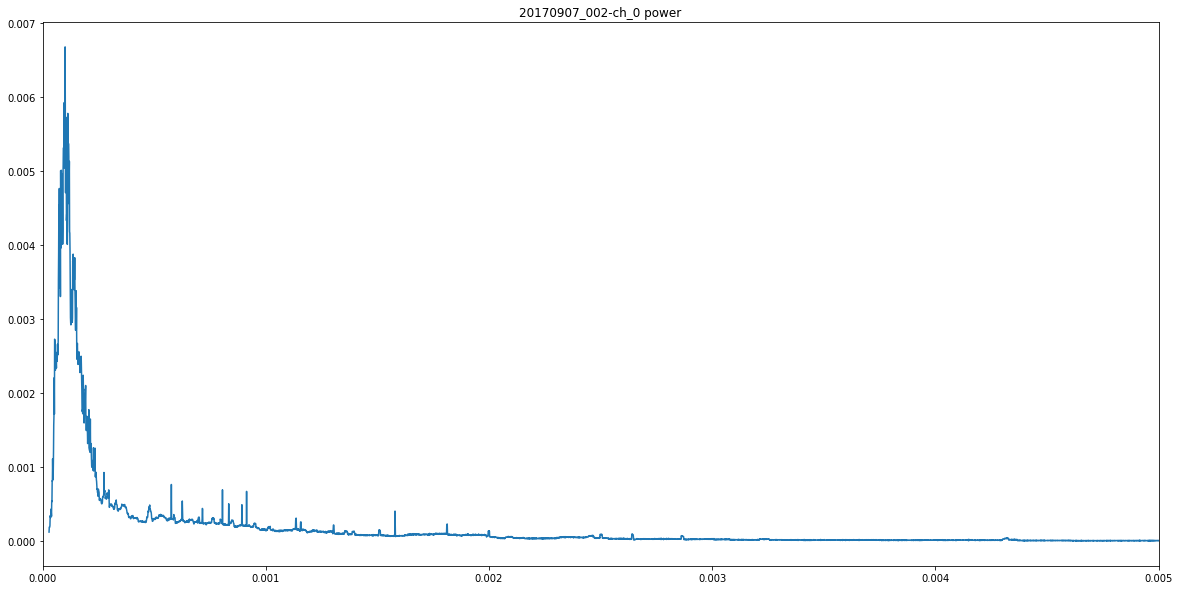

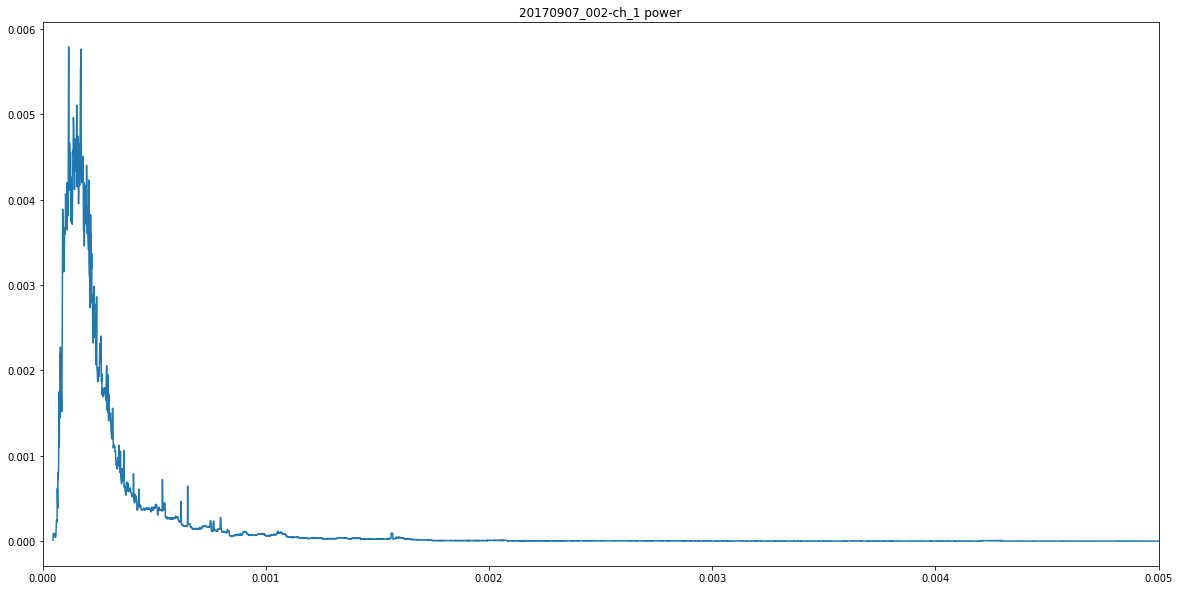

In [7]:
plt.figure(figsize=(20,10))
for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet)
    
    plt.plot(uData, dataCount/auc, label='%s-ch_%d power'%(sessionName, chName))
    #plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.legend()
    plt.xlim(0,0.001)
plt.show()
plt.close()

for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet)
    
    plt.figure(figsize=(20,10))
    plt.plot(uData, dataCount/auc)
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlim(0,dataCount[-1]*0.005)
    plt.show()
    plt.close()

# 将Raw Data压缩在Y轴上

raw data肉眼看可以说是一种正态分布的模式，因而用标准差来做阈值是合情合理的。

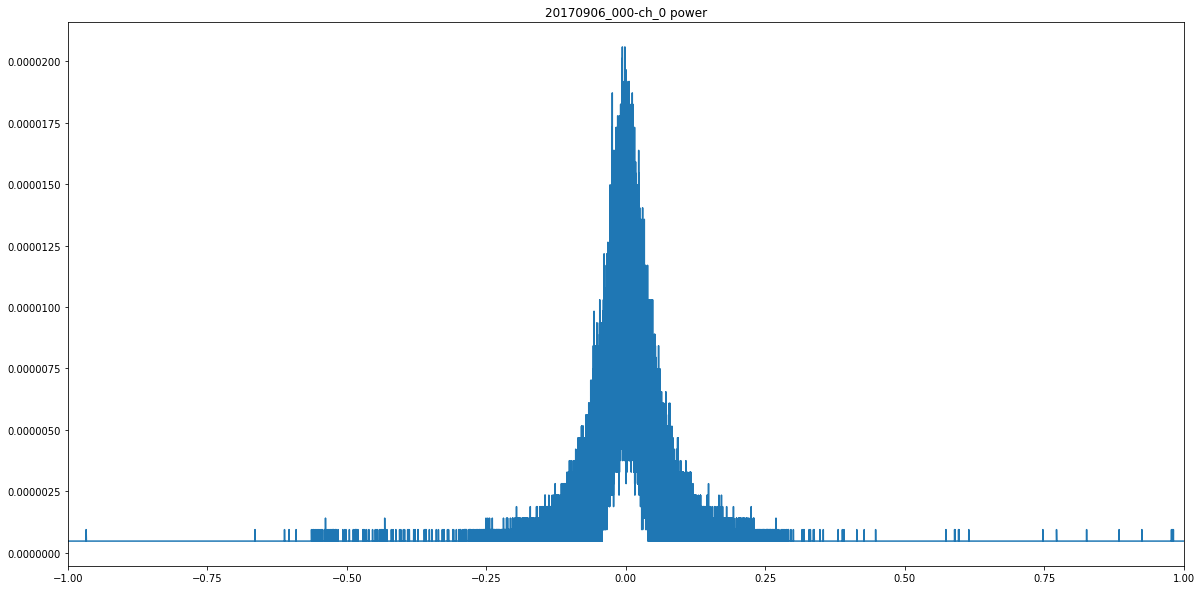

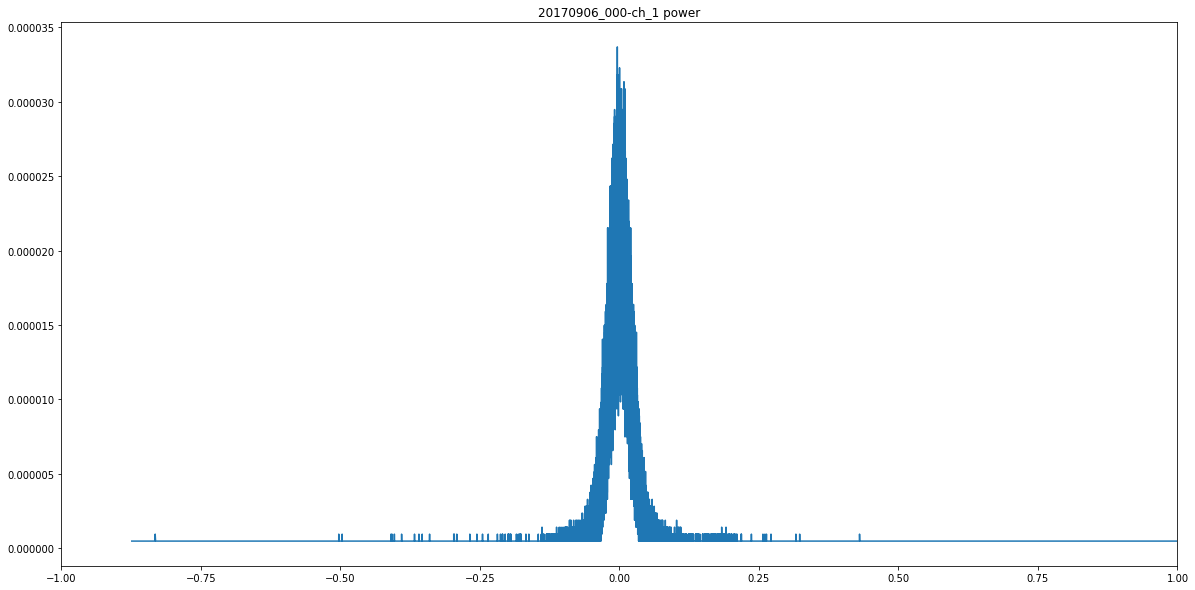

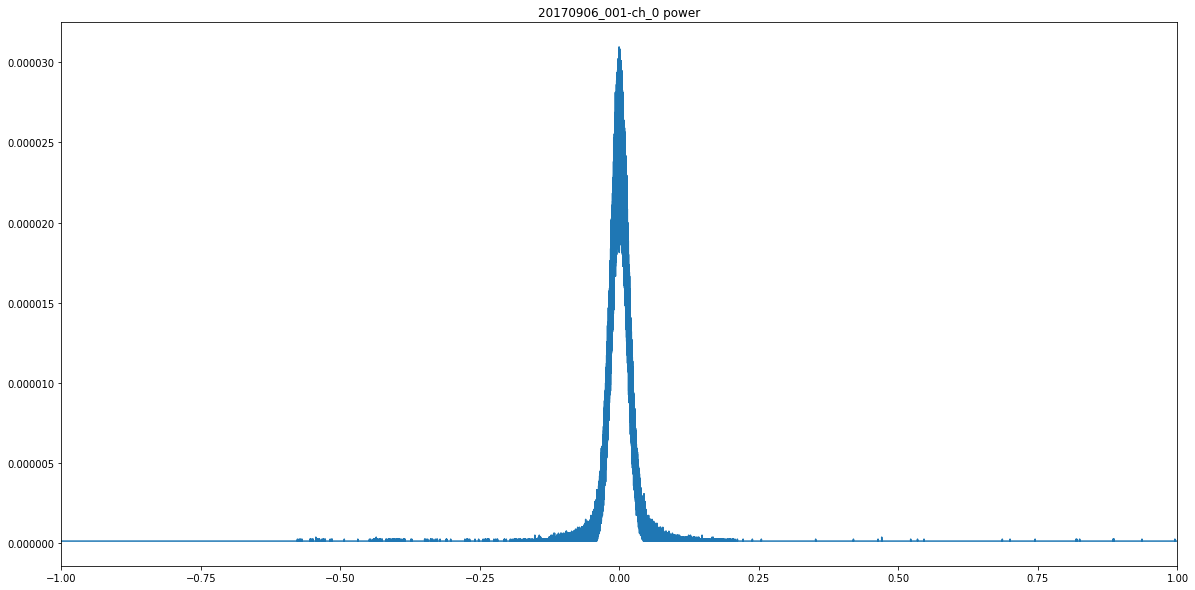

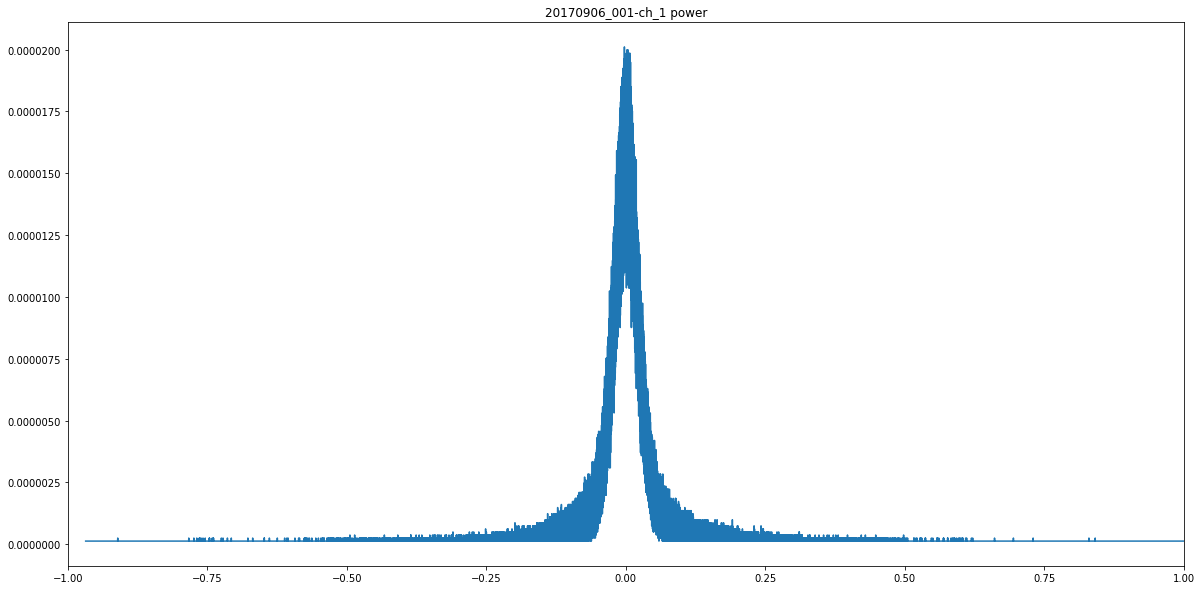

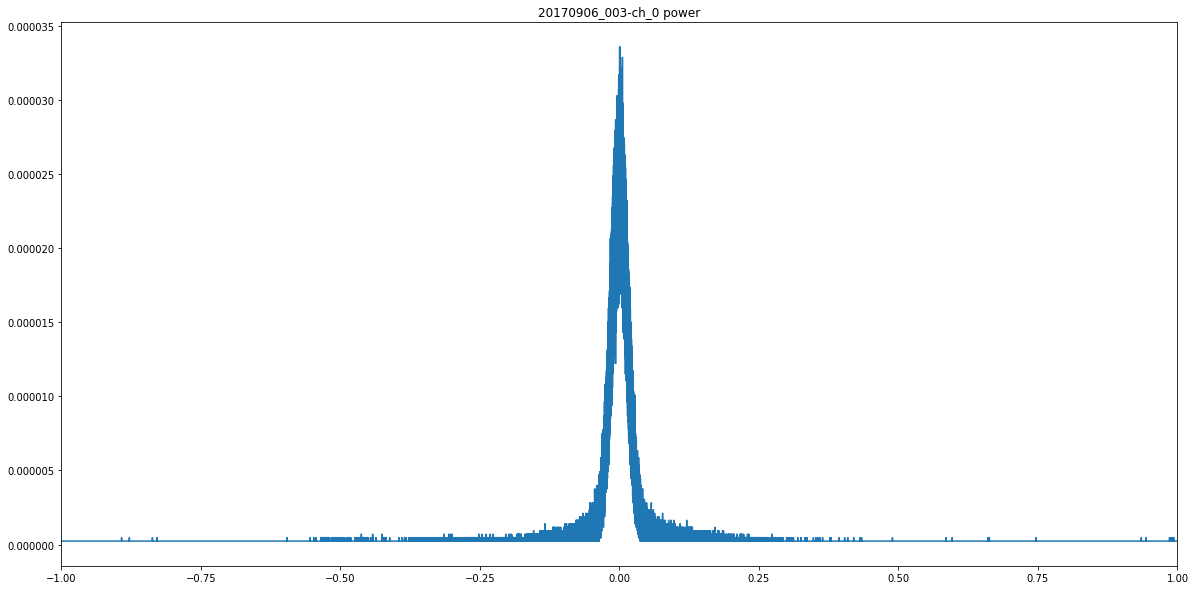

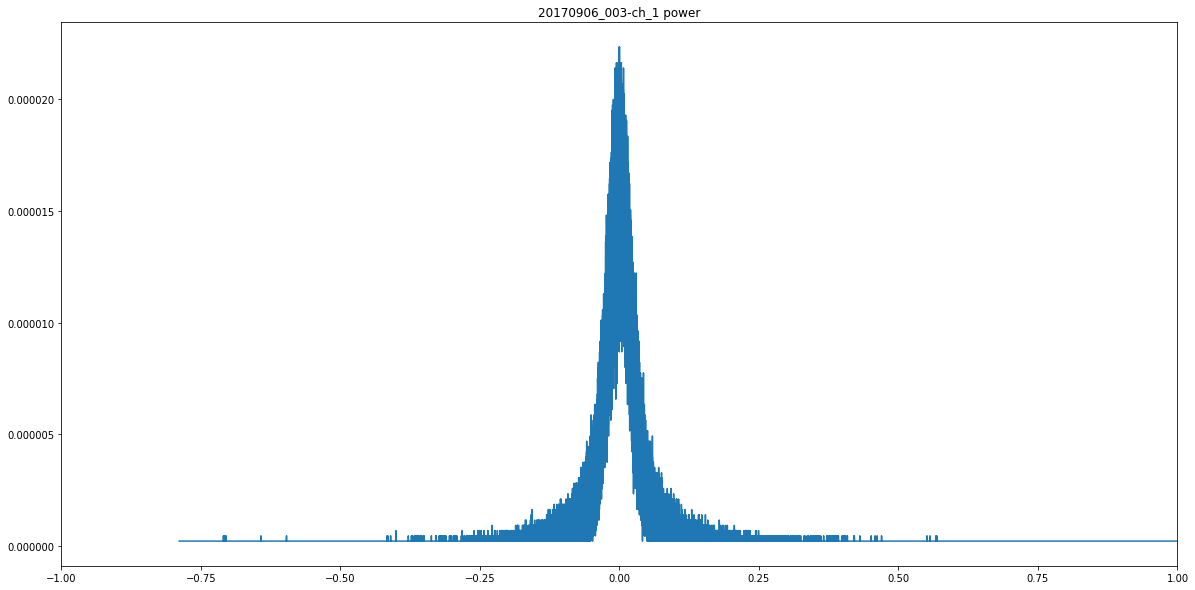

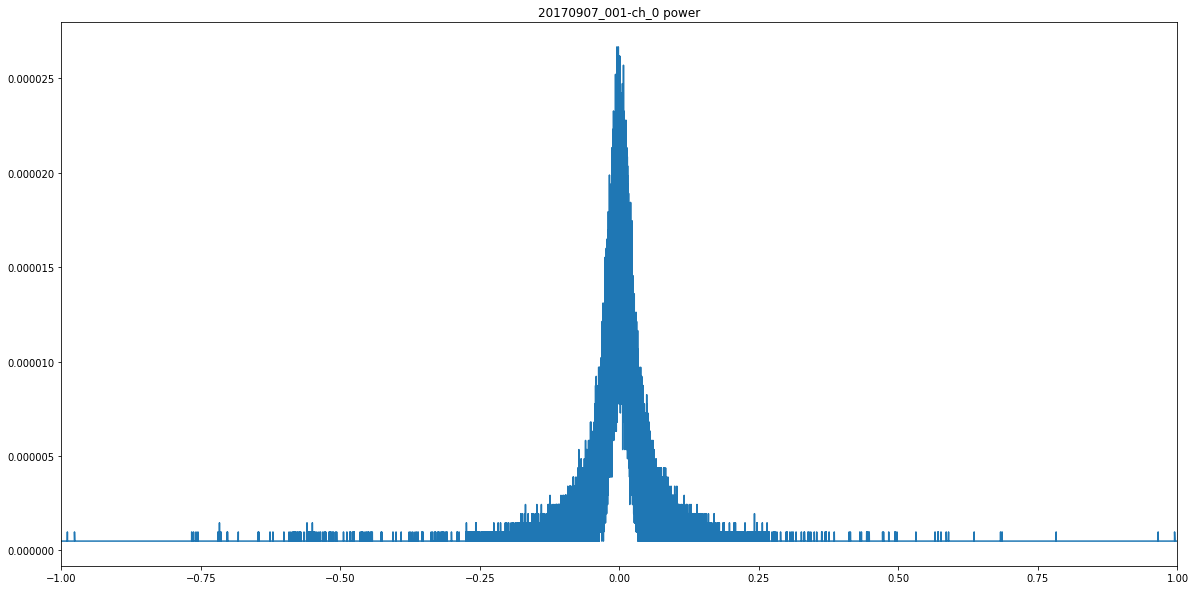

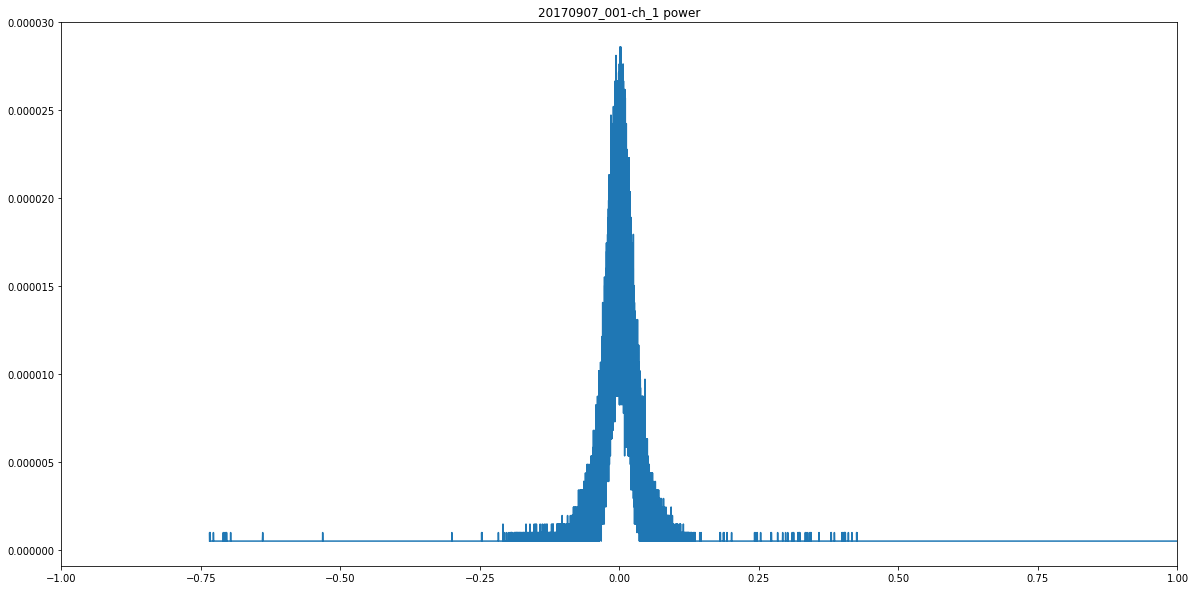

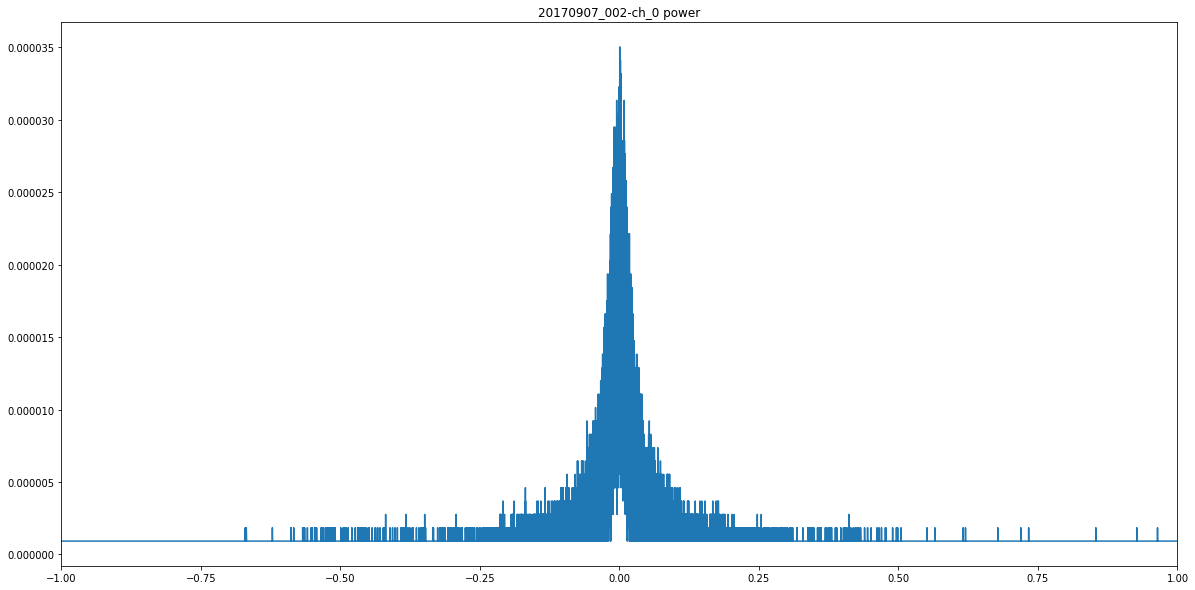

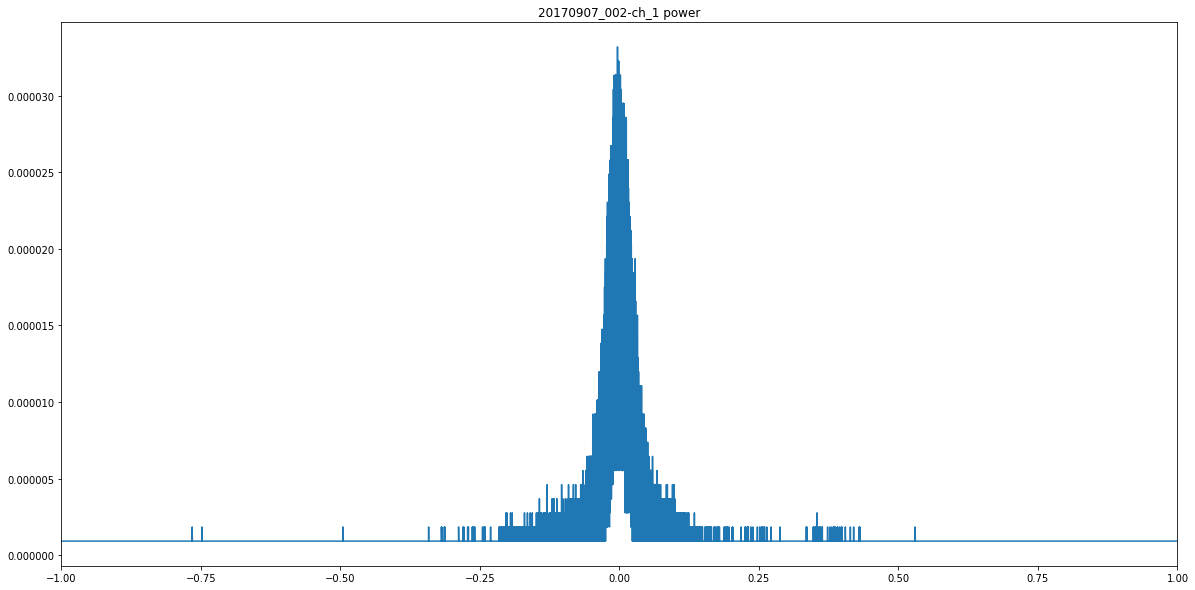

In [4]:
'''plt.figure(figsize=(20,10))
for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet, name='raw')
    
    plt.plot(uData, dataCount/auc, label='%s-ch_%d power'%(sessionName, chName))
    plt.legend()
    plt.xlim(-1,1)
plt.show()
plt.close()
'''
for sessionName, chName, dataSheet in data_set:
    uData, dataCount, auc = countWithRange(dataSheet, name='raw')
    
    plt.figure(figsize=(20,10))
    plt.plot(uData, dataCount/auc)
    plt.title('%s-ch_%d power'%(sessionName, chName))
    plt.xlim(-1,1)
    plt.show()
    plt.close()

# 结论
我们可能需要用一个新的数学函数来拟合power后的数据，并用新函数的参数来设定阈值，可能会比正态分布的sigma的方式更好一点。

### 问题就在于。。😂。。要用什么新的函数呢？